In [702]:
# Imports modules
import pymysql as ms
import matplotlib.pyplot as plt
from pandas import DataFrame

In [703]:
# Calls the connect method from pymysql and pass parameters required to make a connection to the database data
myDb = ms.connect(host='localhost',user='root_admin', passwd='Secured_V@ult10',db='data', port=3306)

In [704]:
# Variable select will be executed as sql code and return everying from table 'user_data'
select = "SELECT * FROM product_data"

In [705]:
# Cursor method allows for the interaction between Python and sql database
# Cursor exexcute runs sql code and fetch returns all values requested
cursor = myDb.cursor()
cursor.execute(select)
result = cursor.fetchall()

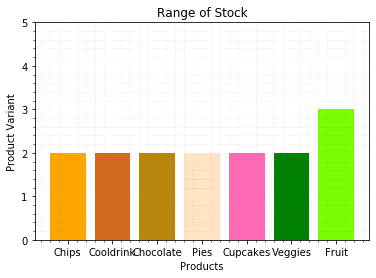

In [706]:
length = {'ID': [],'Chips': [], 'Cooldrink': [], 'Chocolate': [], 'Pies': [], 'Cupcakes': [], 'Veggies': [], 'Fruit': []}
index = ['ID', 'Chips', 'Cooldrink', 'Chocolate', 'Pies', 'Cupcakes', 'Veggies', 'Fruit']

# Creates a DataFrame
df = DataFrame(result, columns=index)
df.set_index('ID')

# Scans through each key and its values.
# It will append 1 to the key that was called in the dictionary length.
# If the value is equal to None it'll skip that value.
for key in df:
    for item in df[key]:
        if item != None:
            length[key].append(1)

# Skips the first value of index which is ID.
x = index[1::]
# Adds all the values up in the array.
y = [ sum(length['Chips']), sum(length['Cooldrink']), sum(length['Chocolate']), sum(length['Pies']), sum(length['Cupcakes']), sum(length['Veggies']), sum(length['Fruit'])]

colors = ["orange", "chocolate", "darkgoldenrod", "bisque", "hotpink", "green", "lawngreen"]

#Adds colors to the graph and align each bar in the center.
plt.bar(x, y, color=colors, align='center')

# Sets the min and max frequency values on the y axis.
plt.ylim(0,5)

plt.title("""Range of Stock""")
plt.xlabel("Products")
plt.ylabel("Product Variant")

# Creates a grid behind the plotted bars.
plt.grid(b=True, which='minor', color='grey', linestyle='dotted', alpha=0.2)

# Activates the grid.
plt.minorticks_on()

plt.show()

cursor.close()